In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.9 MB/s eta 0:00:00


In [3]:
!pip install PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=9ed9bc7ad0cb07caf524c69cb6286e1096855fbc979a684e08fad64c37069f07
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [7]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, GlobalAveragePooling2D, SeparableConv2D, Multiply
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2

# For AdamW optimizer (if available)
try:
    from tensorflow.keras.optimizers import AdamW
except ImportError:
    AdamW = Adam

# IPython displays
from IPython.display import display

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# Google Colab imports
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:

# Kaggle imports
import kagglehub

import zipfile
import os

# Path to your ZIP file in Google Drive
zip_path = "/content/drive/MyDrive/fer2013/fer2013.zip"

# Destination folder where contents will be extracted
extract_path = "/content/fer2013"

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folders/files
print(os.listdir(extract_path))

['test', 'train']


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121, InceptionV3, Xception, EfficientNetB0
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.
Training class distribution:


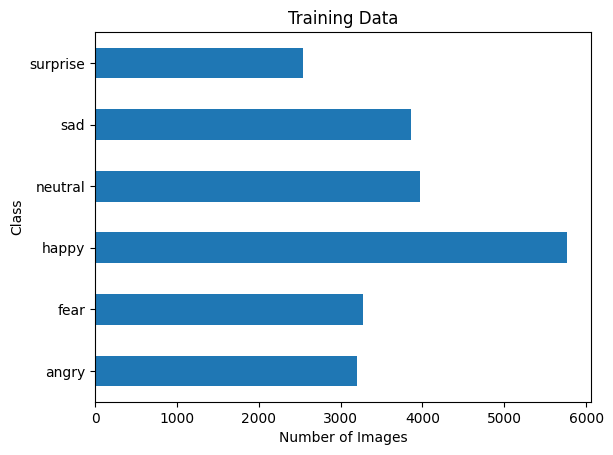

Validation class distribution:


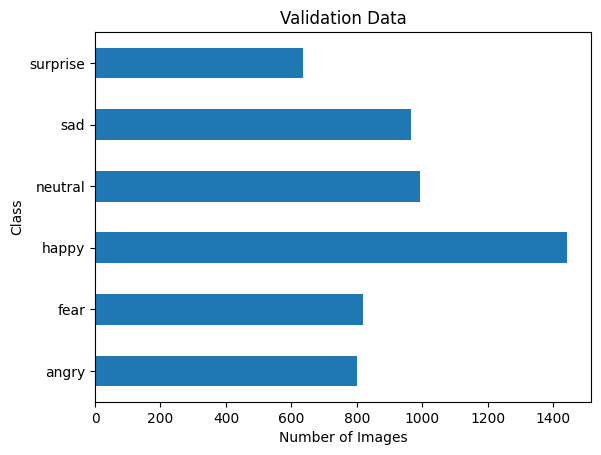

Test class distribution:


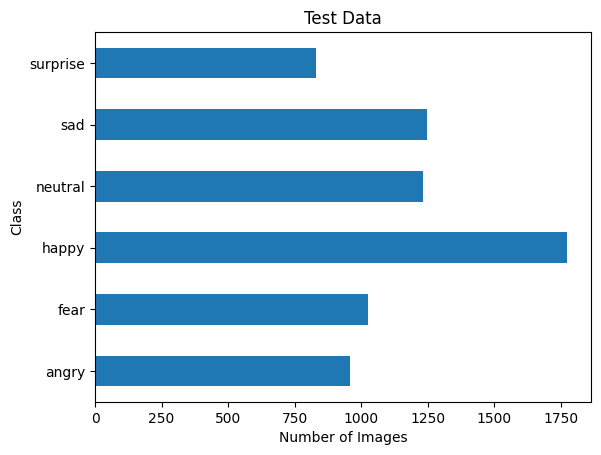

Building ResNet50 Model...
Building VGG16 Model...
Building DenseNet121 Model...
Building Custom Inception Model...
Building Custom Xception Model...
Building EfficientNetB0 Model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training resnet50 Model...
Total layers in resnet50: 11
Trainable layers: 11
Epoch 1/50
707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1953 - loss: 2.1385
Epoch 1: val_accuracy improved from -inf to 0.19632, saving model to best_resnet50_model.keras
707/707 ━━━━━━━━━━━━━━━━━━━━ 76s 73ms/step - accuracy: 0.1953 - loss: 2.1384 - val_accuracy: 0.1963 - val_loss: 1.8402 - learning_rate: 1.0000e-04
Epoch 2/50
707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2260 - loss: 1.8877
Epoch 2: val_accuracy improved from 0.19632 to 0.25663, saving model to best_resnet50_model.keras
707/707 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.2260 - loss: 1.8877 - val_accuracy: 0.2566 - val_loss: 1.7618 - learning_rate: 1.0000e-04
Epoch 3/50
707/707 ━━━━━━━━

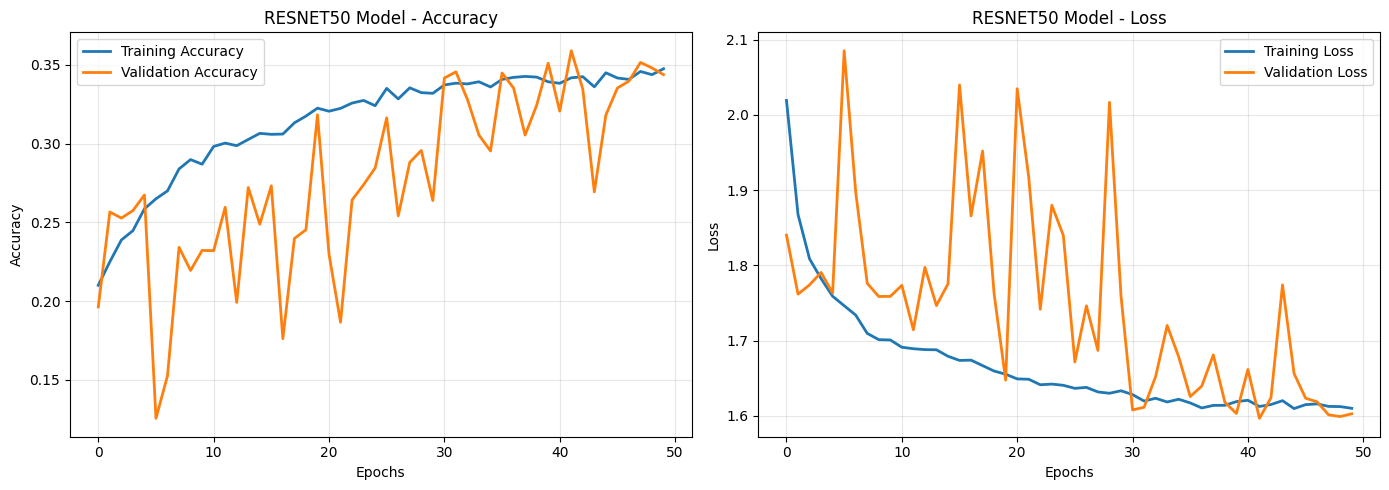

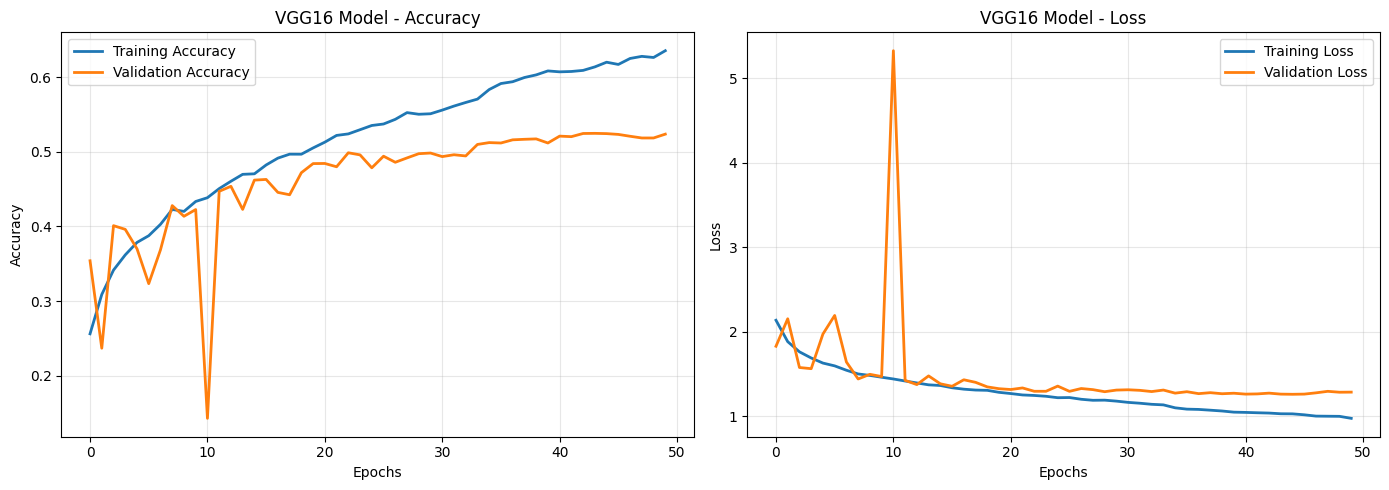

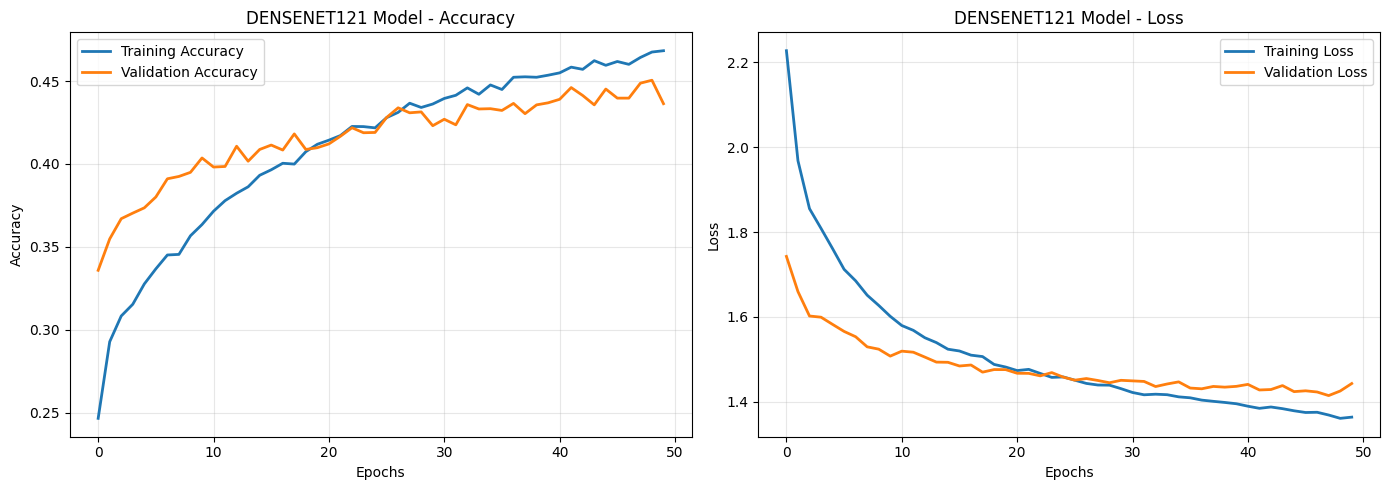

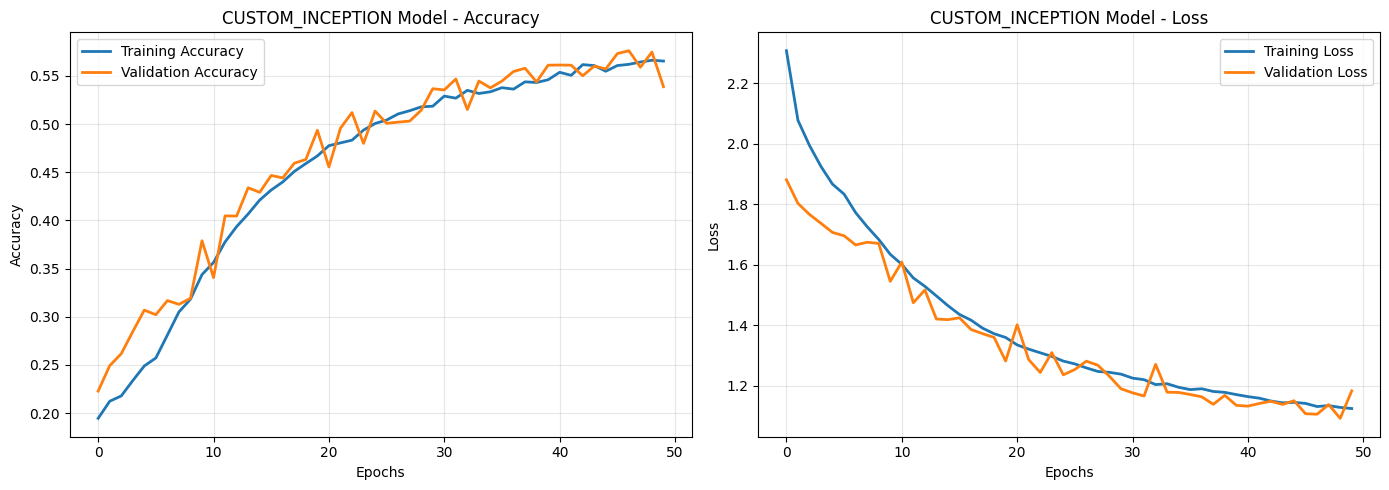

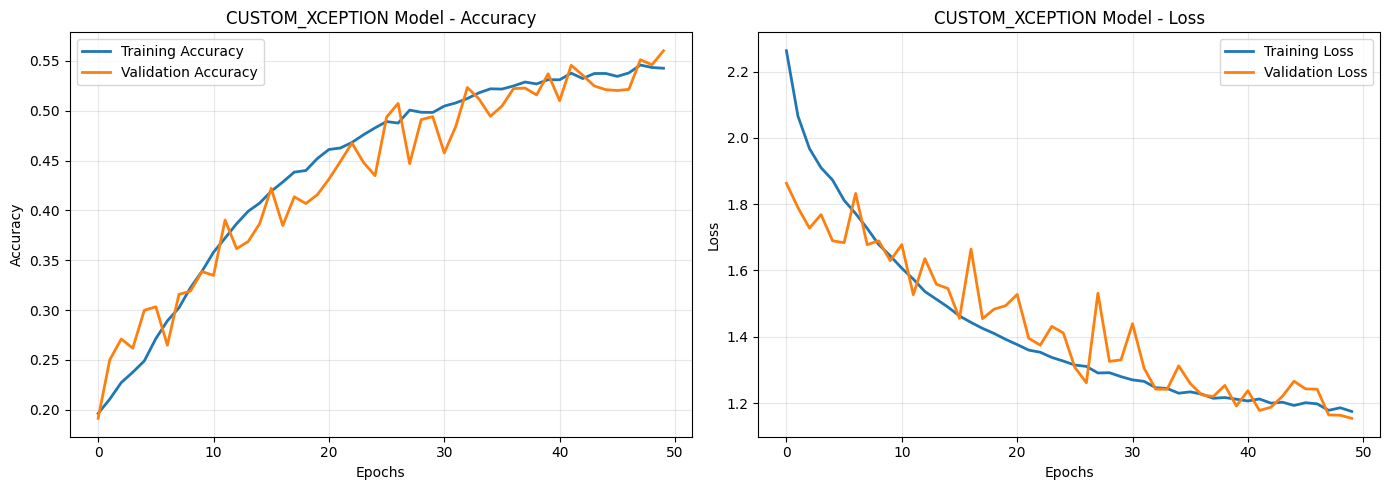

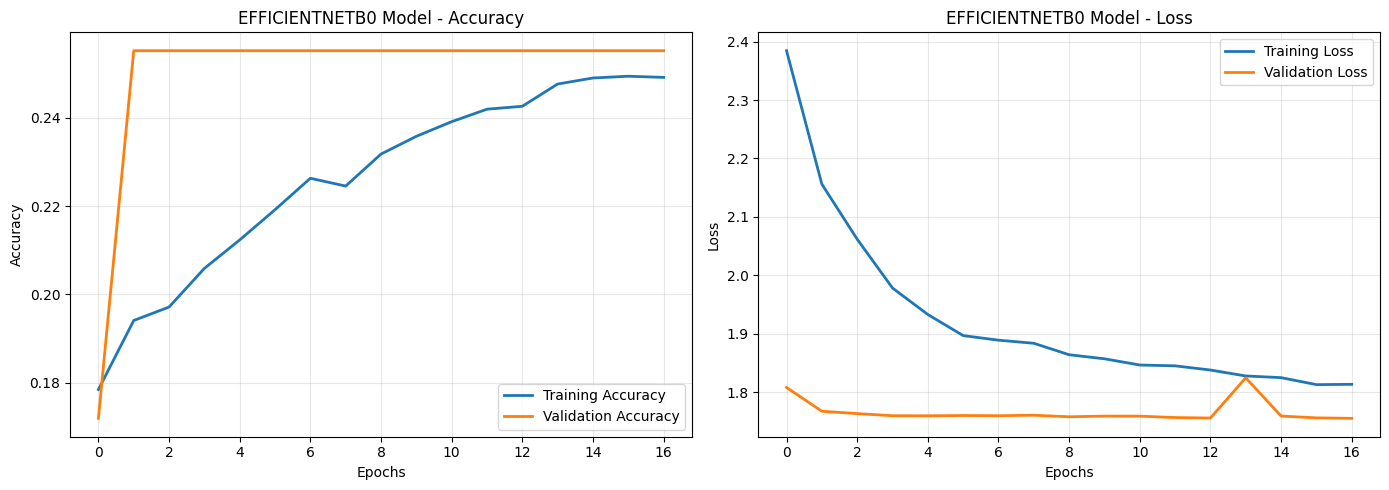


Evaluating Models...

Evaluating resnet50 Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step
Classification Report for RESNET50
              precision    recall  f1-score   support

       angry       0.35      0.19      0.25       958
        fear       0.27      0.14      0.18      1024
       happy       0.49      0.69      0.57      1774
     neutral       0.42      0.33      0.37      1233
         sad       0.40      0.26      0.31      1247
    surprise       0.34      0.73      0.47       831

    accuracy                           0.41      7067
   macro avg       0.38      0.39      0.36      7067
weighted avg       0.39      0.41      0.38      7067



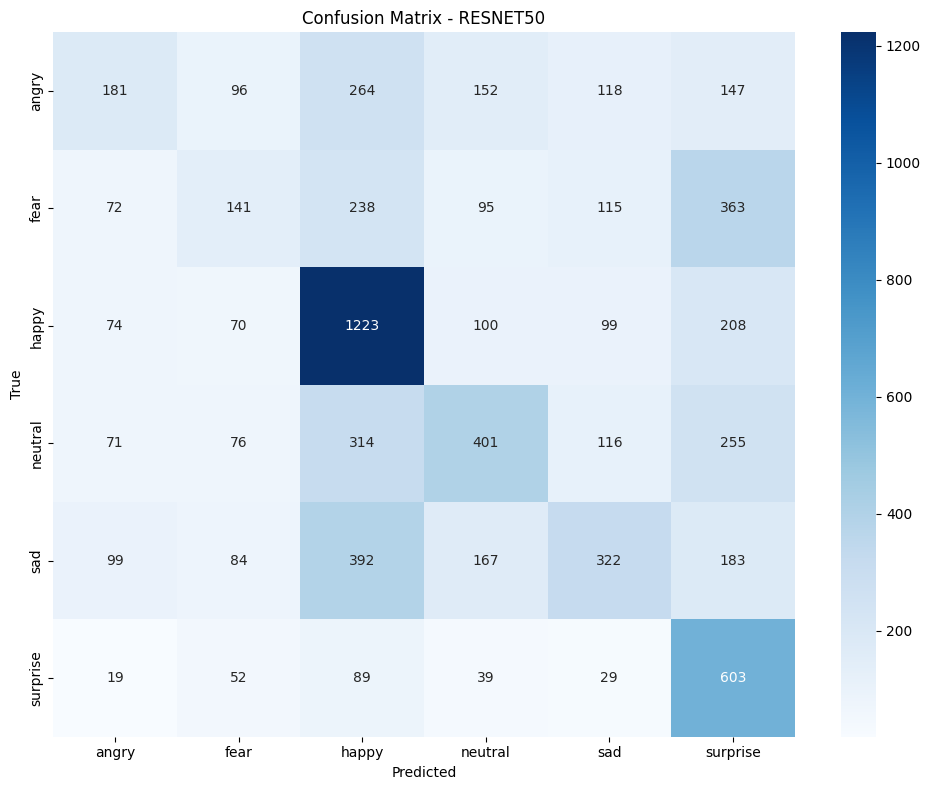

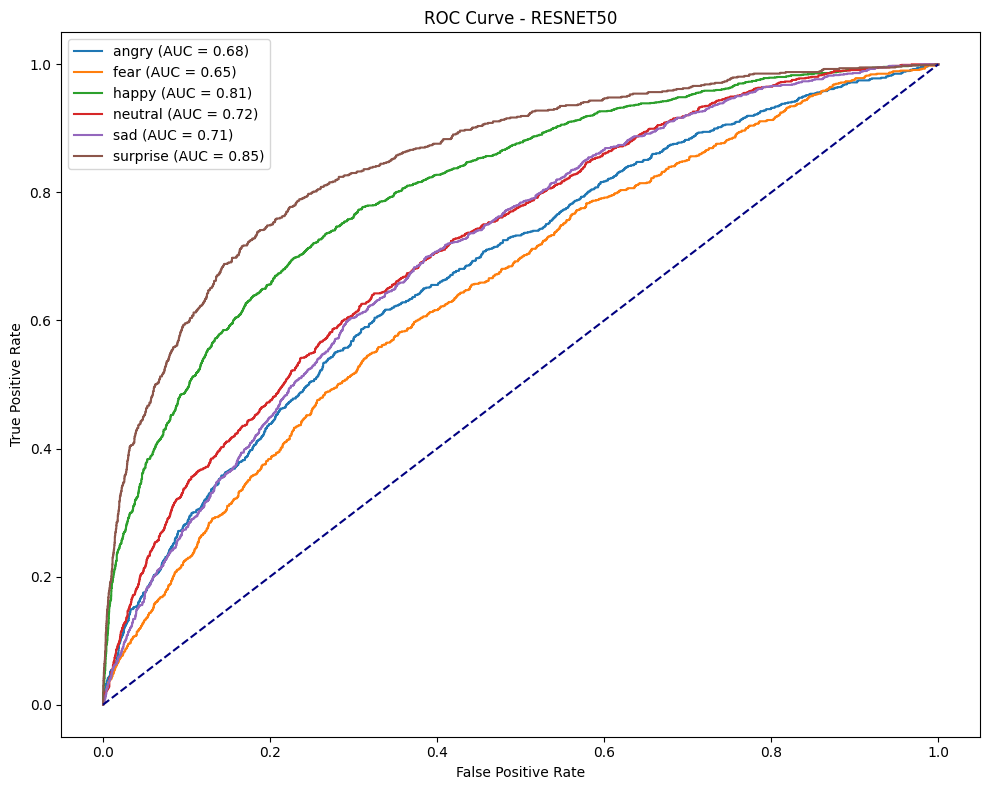

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


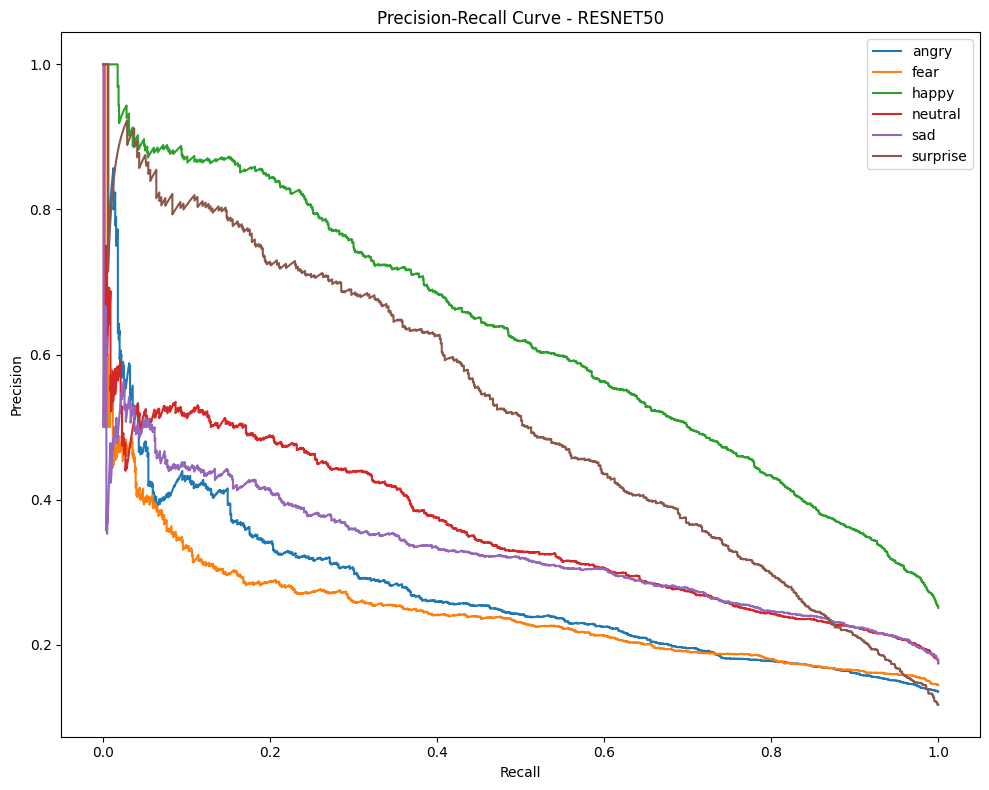

221/221 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.3134 - loss: 1.6529

Evaluating vgg16 Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step
Classification Report for VGG16
              precision    recall  f1-score   support

       angry       0.50      0.49      0.49       958
        fear       0.50      0.33      0.40      1024
       happy       0.70      0.81      0.75      1774
     neutral       0.47      0.66      0.55      1233
         sad       0.53      0.37      0.44      1247
    surprise       0.71      0.69      0.70       831

    accuracy                           0.58      7067
   macro avg       0.57      0.56      0.55      7067
weighted avg       0.57      0.58      0.57      7067



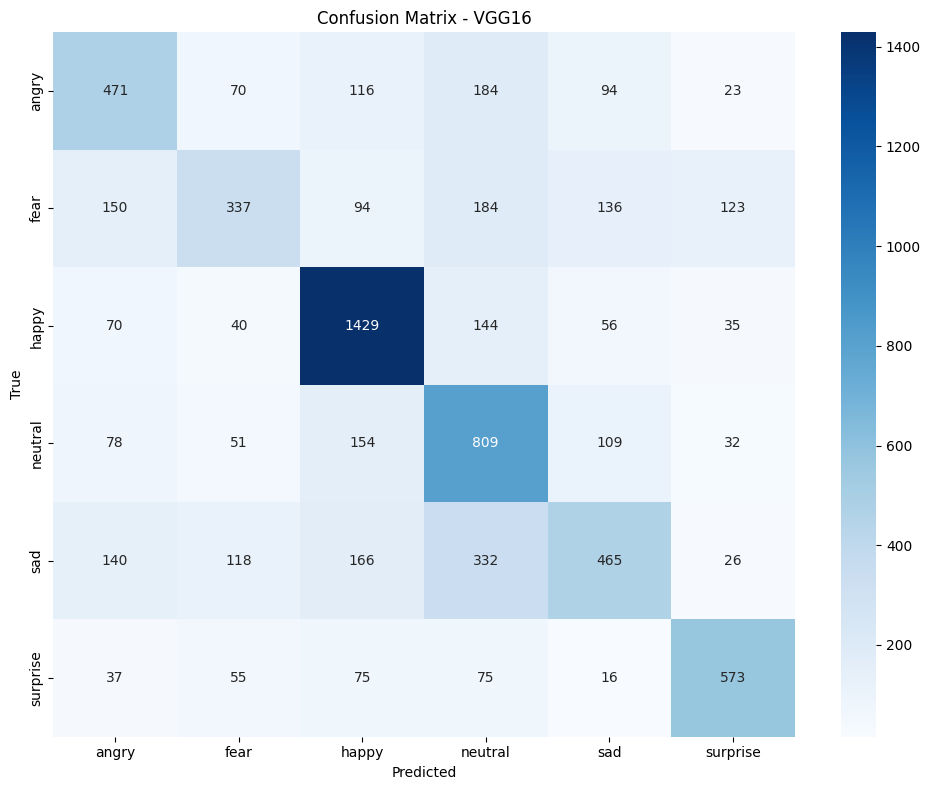

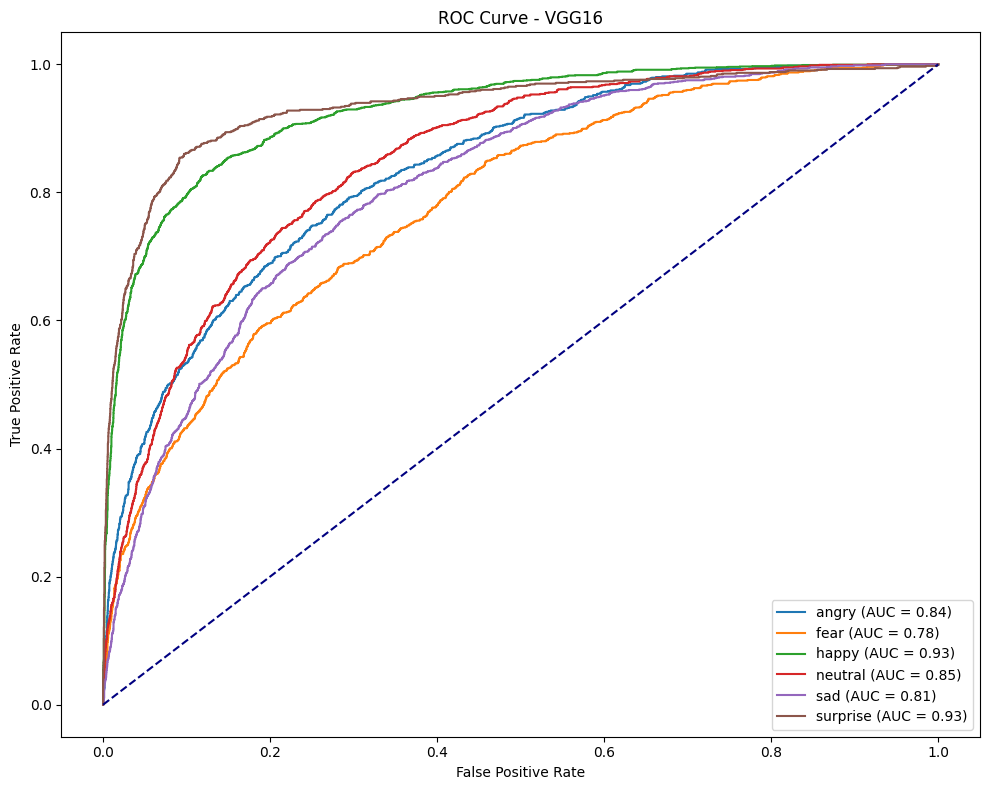

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


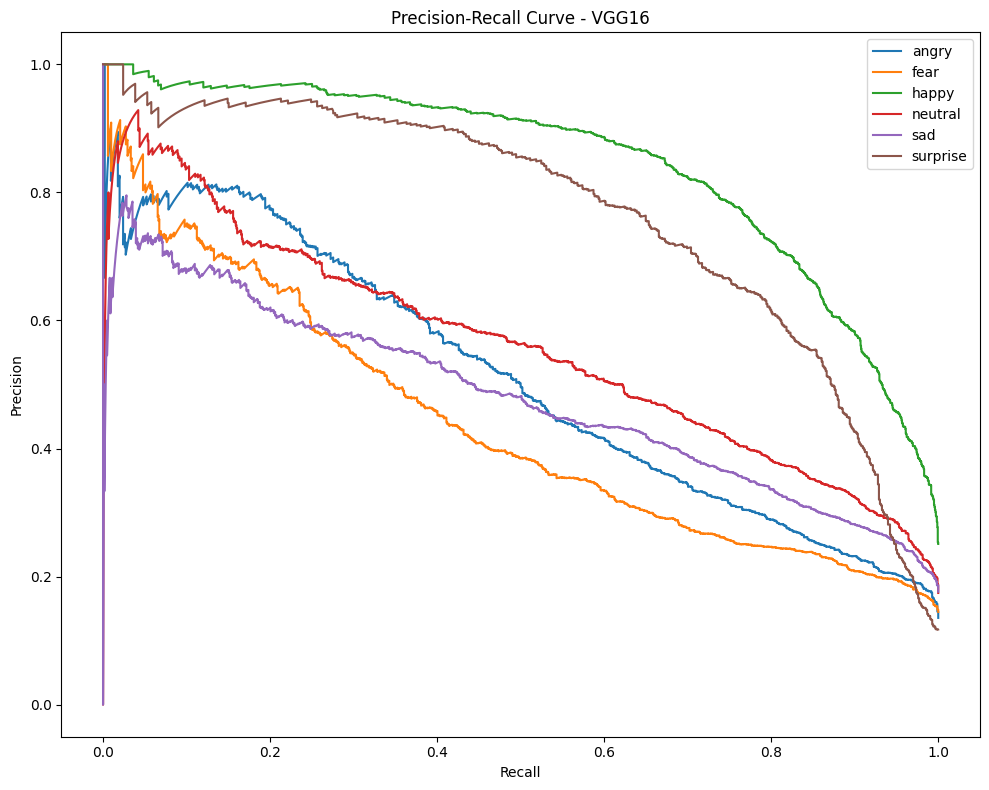

221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5393 - loss: 1.2301

Evaluating densenet121 Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step
Classification Report for DENSENET121
              precision    recall  f1-score   support

       angry       0.43      0.32      0.37       958
        fear       0.42      0.22      0.29      1024
       happy       0.57      0.74      0.64      1774
     neutral       0.41      0.50      0.45      1233
         sad       0.47      0.28      0.35      1247
    surprise       0.48      0.74      0.58       831

    accuracy                           0.48      7067
   macro avg       0.46      0.47      0.45      7067
weighted avg       0.47      0.48      0.46      7067



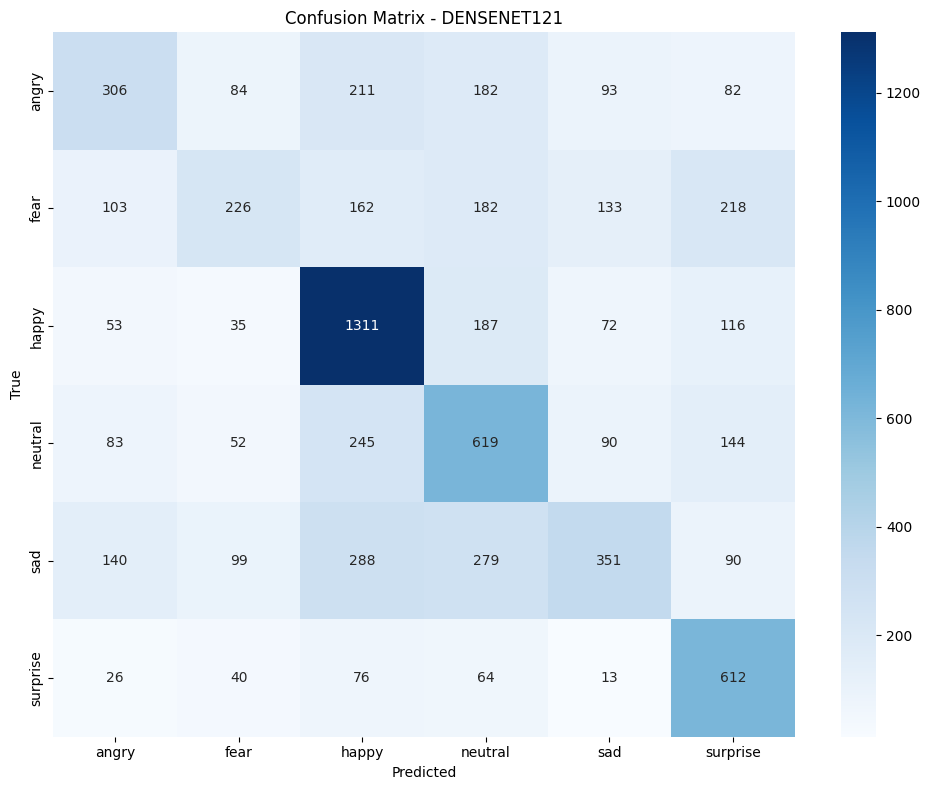

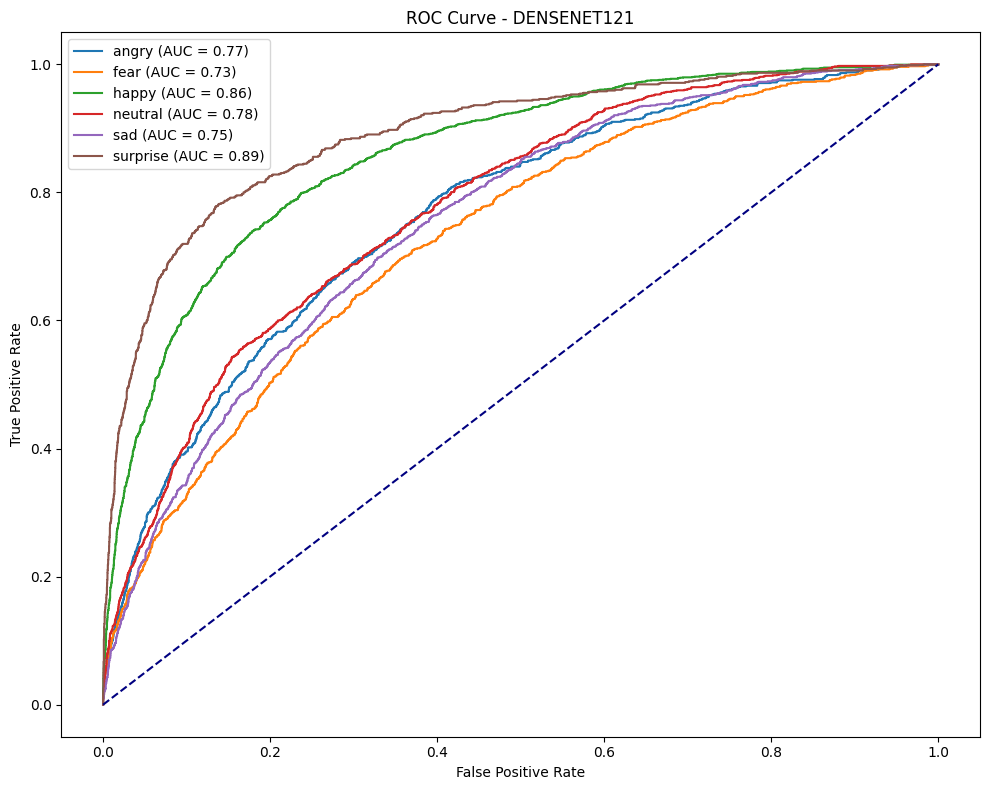

221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step


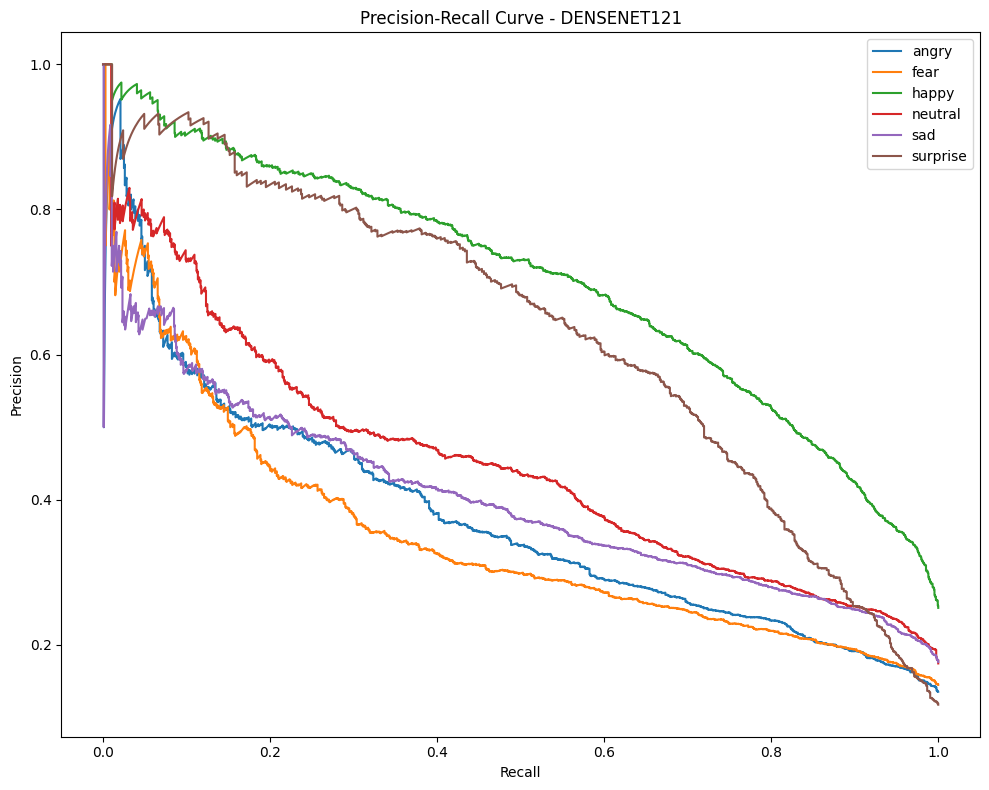

221/221 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.4107 - loss: 1.4971

Evaluating custom_inception Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
Classification Report for CUSTOM_INCEPTION
              precision    recall  f1-score   support

       angry       0.50      0.53      0.51       958
        fear       0.43      0.32      0.37      1024
       happy       0.82      0.84      0.83      1774
     neutral       0.50      0.65      0.56      1233
         sad       0.50      0.40      0.44      1247
    surprise       0.71      0.77      0.74       831

    accuracy                           0.60      7067
   macro avg       0.58      0.58      0.57      7067
weighted avg       0.59      0.60      0.59      7067



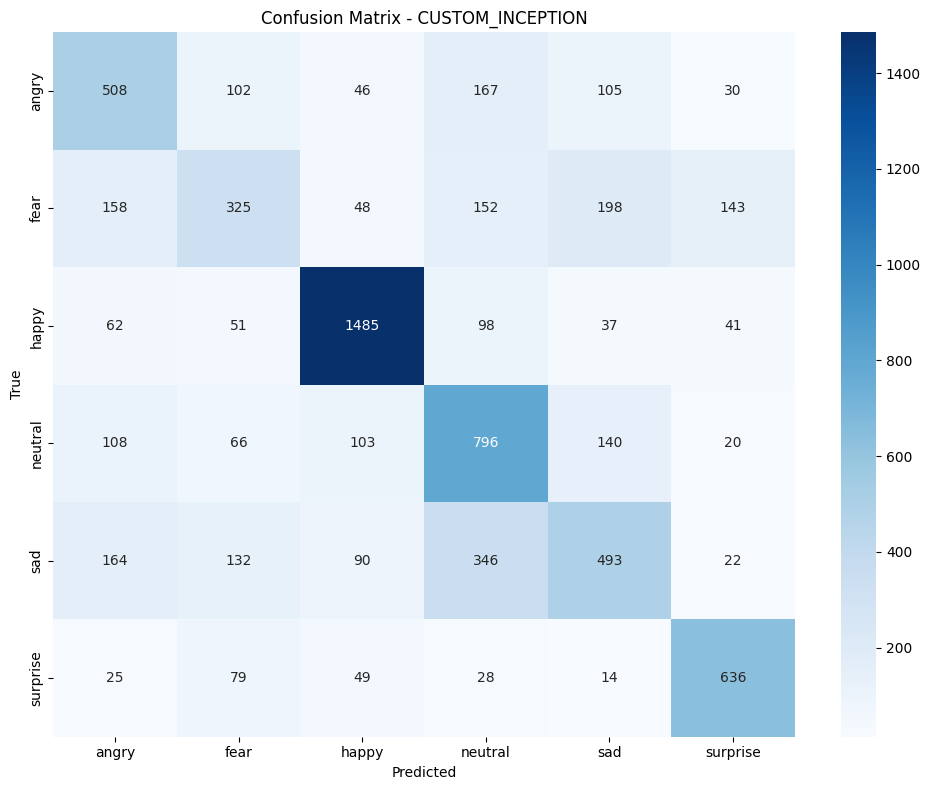

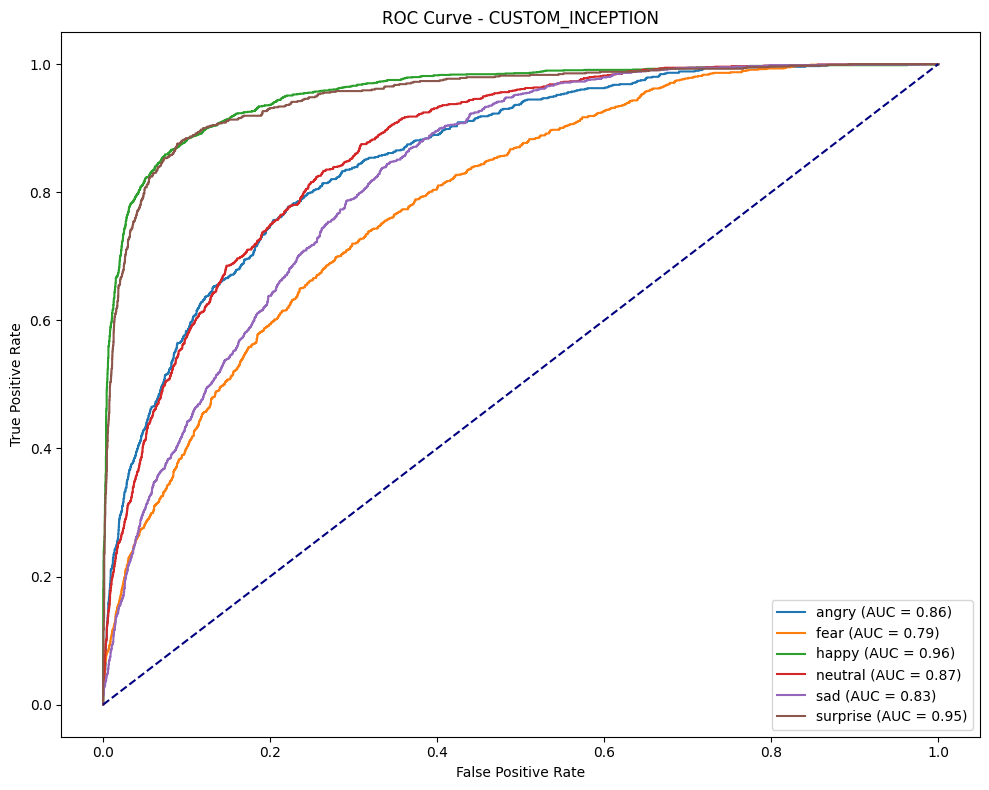

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


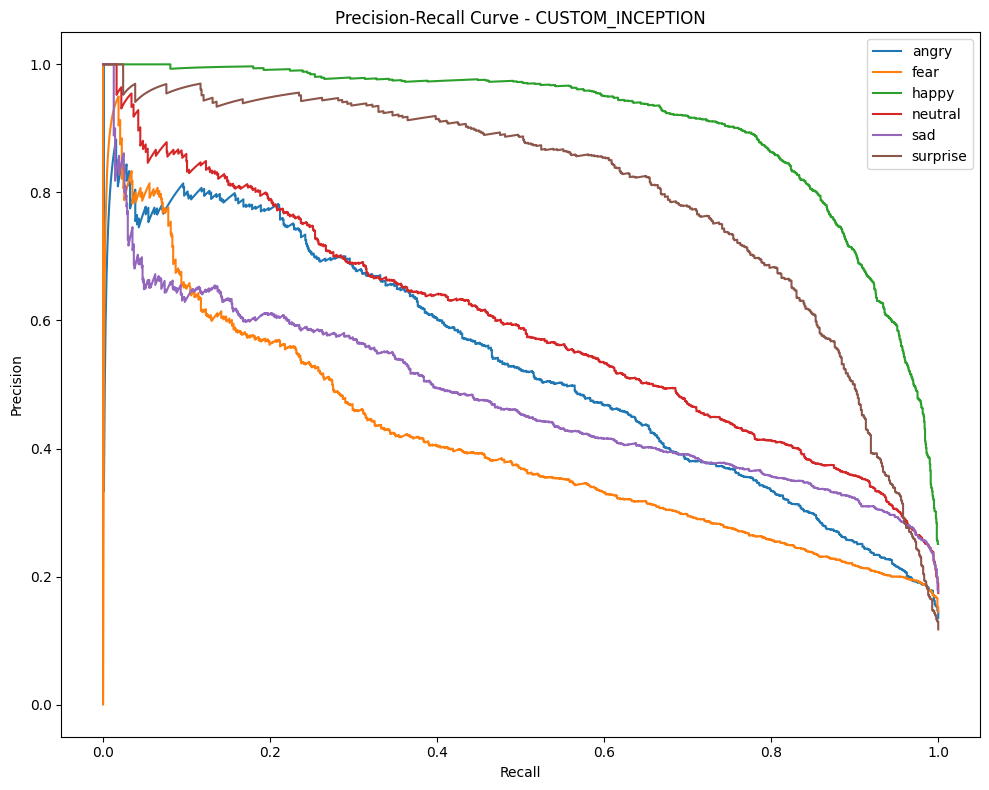

221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5599 - loss: 1.1029

Evaluating custom_xception Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step
Classification Report for CUSTOM_XCEPTION
              precision    recall  f1-score   support

       angry       0.43      0.60      0.50       958
        fear       0.51      0.16      0.25      1024
       happy       0.75      0.85      0.80      1774
     neutral       0.51      0.59      0.55      1233
         sad       0.46      0.40      0.43      1247
    surprise       0.69      0.75      0.72       831

    accuracy                           0.58      7067
   macro avg       0.56      0.56      0.54      7067
weighted avg       0.57      0.58      0.56      7067



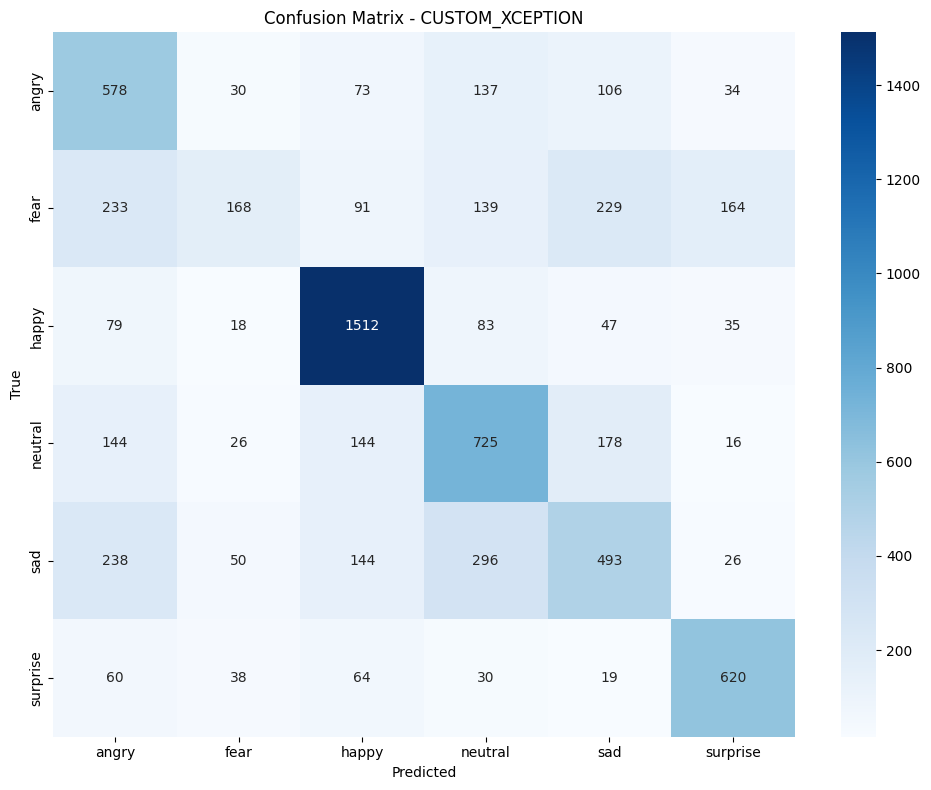

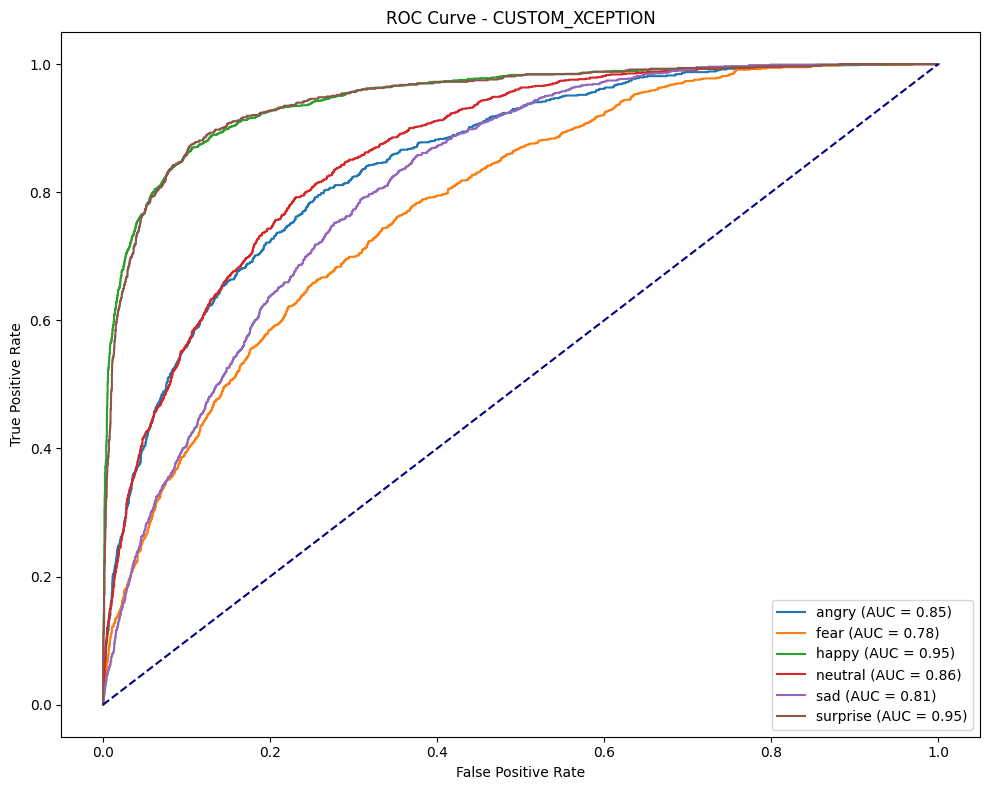

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


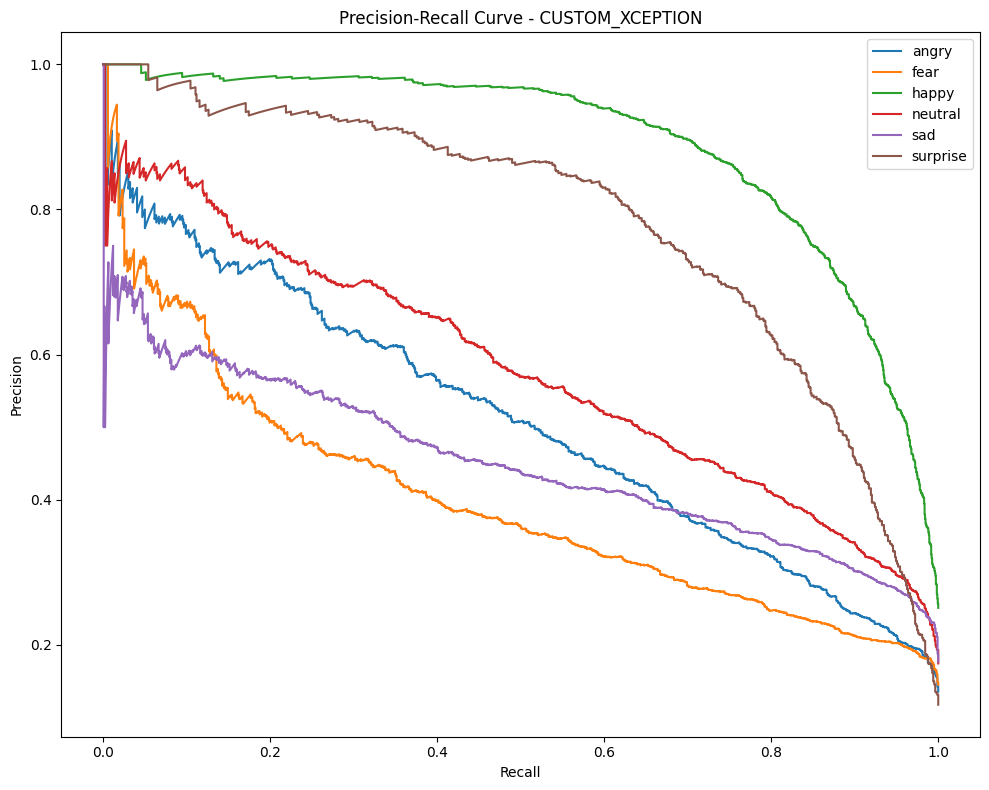

221/221 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5521 - loss: 1.1309

Evaluating efficientnetb0 Model...
221/221 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step
Classification Report for EFFICIENTNETB0
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
        fear       0.00      0.00      0.00      1024
       happy       0.25      1.00      0.40      1774
     neutral       0.00      0.00      0.00      1233
         sad       0.20      0.00      0.00      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.25      7067
   macro avg       0.08      0.17      0.07      7067
weighted avg       0.10      0.25      0.10      7067



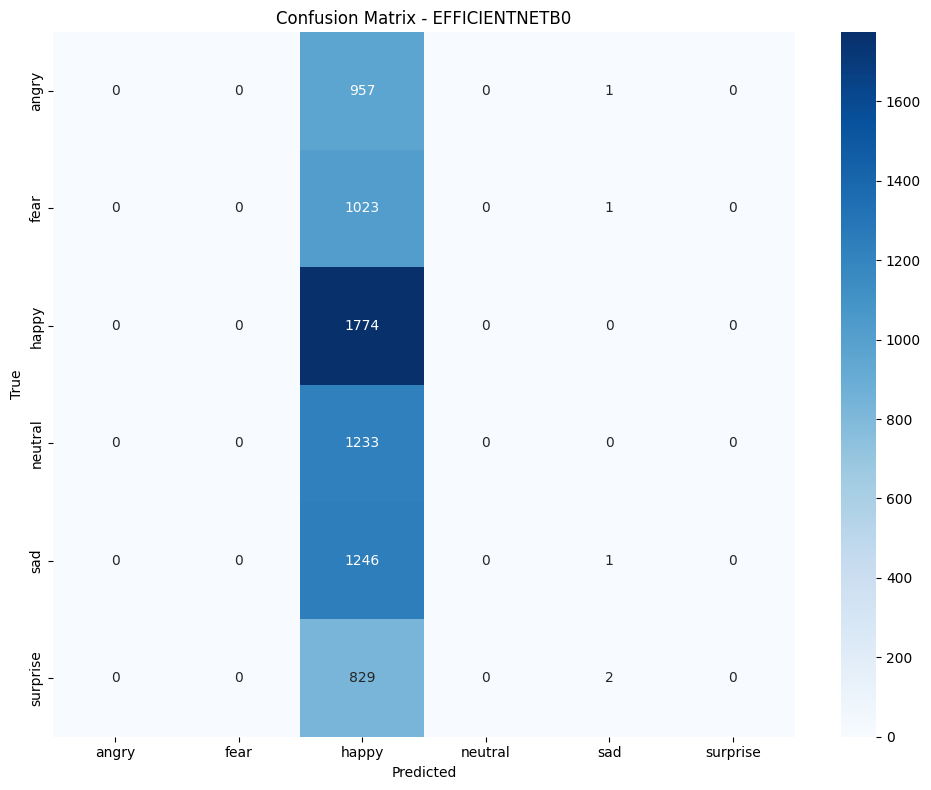

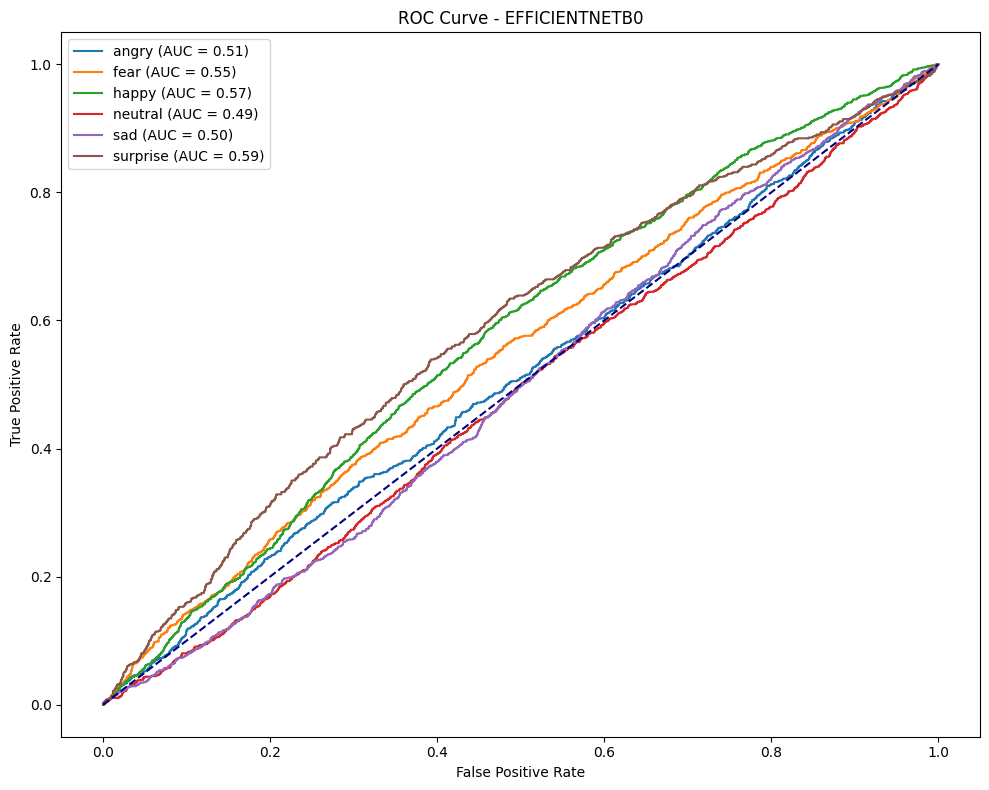

221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step


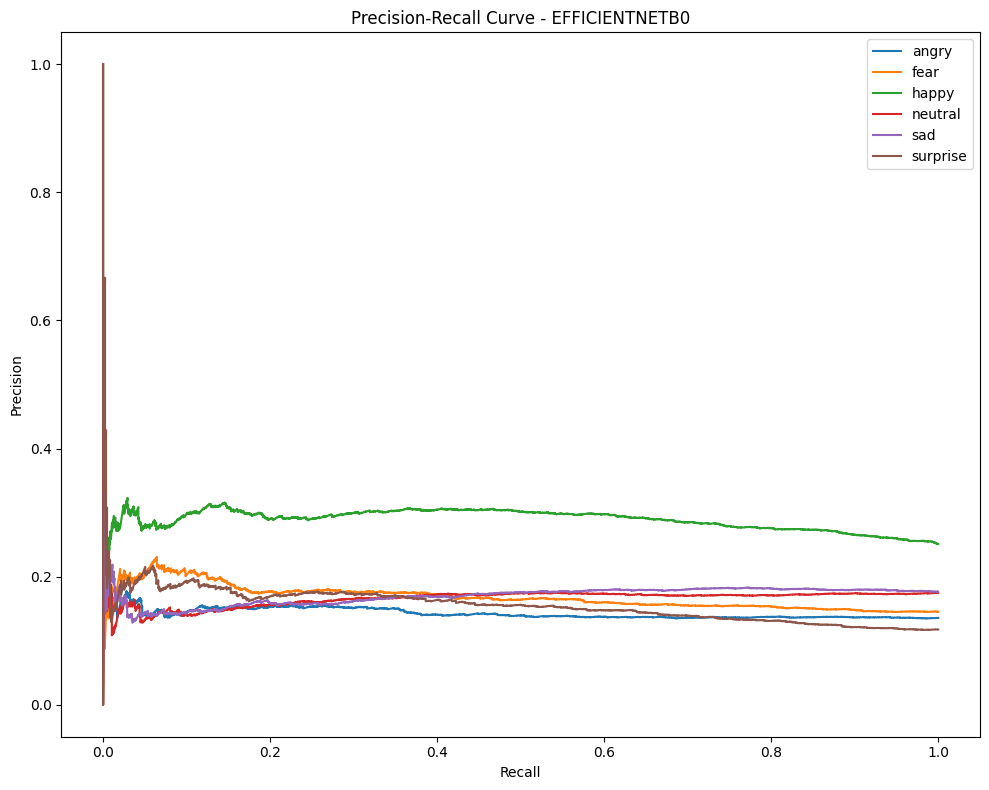

221/221 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.2311 - loss: 1.7474



MODEL PERFORMANCE COMPARISON
RESNET50             - Test Accuracy: 0.4063, Test Loss: 1.5210
VGG16                - Test Accuracy: 0.5779, Test Loss: 1.1601
DENSENET121          - Test Accuracy: 0.4846, Test Loss: 1.3646
CUSTOM_INCEPTION     - Test Accuracy: 0.6004, Test Loss: 1.0360
CUSTOM_XCEPTION      - Test Accuracy: 0.5796, Test Loss: 1.0854
EFFICIENTNETB0       - Test Accuracy: 0.2512, Test Loss: 1.7688

🎯 BEST MODEL: CUSTOM_INCEPTION with accuracy: 0.6004

Saving models...


Saved: fer_resnet50_grayscale_model.h5


Saved: fer_vgg16_grayscale_model.h5


Saved: fer_densenet121_grayscale_model.h5
Saved: fer_custom_inception_grayscale_model.h5


Saved: fer_custom_xception_grayscale_model.h5
Saved: fer_efficientnetb0_grayscale_model.h5
All models saved successfully!


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, DenseNet121, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# ---------------------------- Configurations ---------------------------- #
IMAGE_SIZE = 48
BATCH_SIZE = 32
EPOCHS = 50

TRAIN_PATH = "/content/fer2013/train"
TEST_PATH = "/content/fer2013/test"
SELECTED_CLASSES = ['angry', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# ---------------------------- Utility Functions ---------------------------- #
def plot_class_distribution(generator, title):
    """Plot class distribution of a dataset."""
    class_counts = generator.classes
    class_labels = list(generator.class_indices.keys())
    counts = pd.Series(class_counts).value_counts(sort=False)
    counts.index = [class_labels[i] for i in counts.index]
    counts.plot(kind='barh', title=title)
    plt.xlabel('Number of Images')
    plt.ylabel('Class')
    plt.show()

# ---------------------------- Grayscale Data Generators ---------------------------- #
def create_grayscale_generators(train_path, test_path, img_size, batch_size, selected_classes):
    """Create grayscale data generators with augmentation."""
    train_preprocessor = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.25,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=0.2
    )

    test_preprocessor = ImageDataGenerator(rescale=1./255)

    train_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode="categorical",
        subset="training",
        classes=selected_classes,
        shuffle=True
    )

    validation_generator = train_preprocessor.flow_from_directory(
        train_path,
        target_size=(img_size, img_size),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode="categorical",
        subset="validation",
        classes=selected_classes,
        shuffle=False
    )

    test_generator = test_preprocessor.flow_from_directory(
        test_path,
        target_size=(img_size, img_size),
        color_mode='grayscale',
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=False,
        classes=selected_classes
    )

    return train_generator, validation_generator, test_generator

# ---------------------------- Improved Grayscale Model Building Functions ---------------------------- #
def build_resnet50_grayscale(input_shape, num_classes):
    """Build ResNet50 model for grayscale images with fine-tuning."""
    # Create base model
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Create input for grayscale
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convert grayscale to 3 channels by repeating the channel
    x = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

    # Pass through ResNet50
    x = base_model(x, training=False)

    # Add custom head
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Fine-tuning: Unfreeze last 30 layers
    base_model.trainable = True
    for layer in base_model.layers[:-30]:
        layer.trainable = False

    return model

def build_vgg16_grayscale(input_shape, num_classes):
    """Build VGG16 model for grayscale images with fine-tuning."""
    # Create base model
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Create input for grayscale
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convert grayscale to 3 channels
    x = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

    # Pass through VGG16
    x = base_model(x, training=False)

    # Add custom head
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Fine-tuning: Unfreeze last 4 blocks
    base_model.trainable = True
    for layer in base_model.layers[:15]:
        layer.trainable = False

    return model

def build_densenet121_grayscale(input_shape, num_classes):
    """Build DenseNet121 model for grayscale images with fine-tuning."""
    # Create base model
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Create input for grayscale
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convert grayscale to 3 channels
    x = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

    # Pass through DenseNet121
    x = base_model(x, training=False)

    # Add custom head
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Fine-tuning: Unfreeze last 100 layers
    base_model.trainable = True
    for layer in base_model.layers[:-100]:
        layer.trainable = False

    return model

def build_custom_inception_grayscale(input_shape, num_classes):
    """Build custom Inception-like model for 48x48 grayscale images."""
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Initial conv layer
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Inception-like block 1
    branch1 = Conv2D(64, (1, 1), activation='relu', padding='same')(x)

    branch2 = Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch2 = Conv2D(64, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    branch3 = Conv2D(64, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = Conv2D(64, (1, 1), activation='relu', padding='same')(branch4)

    x = tf.keras.layers.concatenate([branch1, branch2, branch3, branch4])
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)

    # Inception-like block 2
    branch1 = Conv2D(128, (1, 1), activation='relu', padding='same')(x)

    branch2 = Conv2D(128, (1, 1), activation='relu', padding='same')(x)
    branch2 = Conv2D(128, (3, 3), activation='relu', padding='same')(branch2)

    branch3 = Conv2D(128, (1, 1), activation='relu', padding='same')(x)
    branch3 = Conv2D(128, (5, 5), activation='relu', padding='same')(branch3)

    branch4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch4 = Conv2D(128, (1, 1), activation='relu', padding='same')(branch4)

    x = tf.keras.layers.concatenate([branch1, branch2, branch3, branch4])
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    # Classifier
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

def build_custom_xception_grayscale(input_shape, num_classes):
    """Build custom Xception-like model for 48x48 grayscale images."""
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Entry flow
    x = Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Middle flow with depthwise separable convolutions
    # First separable conv block
    x = tf.keras.layers.SeparableConv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(0.2)(x)

    # Second separable conv block
    x = tf.keras.layers.SeparableConv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = MaxPooling2D((2, 2))(x)

    # Third separable conv block
    x = tf.keras.layers.SeparableConv2D(512, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = Dropout(0.3)(x)

    # Exit flow
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

def build_efficientnetb0_grayscale(input_shape, num_classes):
    """Build EfficientNetB0 model for grayscale images with fine-tuning."""
    # Create base model
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(input_shape[0], input_shape[1], 3)
    )

    # Create input for grayscale
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convert grayscale to 3 channels
    x = tf.keras.layers.Lambda(lambda x: tf.repeat(x, 3, axis=-1))(inputs)

    # Pass through EfficientNetB0
    x = base_model(x, training=False)

    # Add custom head
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Fine-tuning: Unfreeze last 50 layers
    base_model.trainable = True
    for layer in base_model.layers[:-50]:
        layer.trainable = False

    return model

# ---------------------------- Enhanced Callbacks ---------------------------- #
def get_enhanced_callbacks(model_name):
    """Get enhanced callbacks for training."""
    checkpoint = ModelCheckpoint(
        f"best_{model_name}_model.keras",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor="val_accuracy",
        patience=15,
        restore_best_weights=True,
        mode='max',
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )

    return [checkpoint, early_stopping, reduce_lr]

# ---------------------------- Model Evaluation ---------------------------- #
def evaluate_and_plot_metrics(model, generator, selected_classes, title):
    """Evaluate model and plot confusion matrix, ROC curve, and precision-recall curve."""
    predictions = model.predict(generator)
    pred_classes = np.argmax(predictions, axis=1)
    true_classes = generator.classes

    print(f"Classification Report for {title}")
    print(classification_report(true_classes, pred_classes, target_names=selected_classes))

    # Confusion Matrix
    cm = confusion_matrix(true_classes, pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(true_binary[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------- PR Curve Plot ---------------------------- #
def plot_precision_recall_curve(generator, predictions, selected_classes, title):
    """Plot Precision-Recall curve for each class."""
    true_classes = generator.classes
    true_binary = tf.keras.utils.to_categorical(true_classes, num_classes=len(selected_classes))

    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(true_binary[:, i], predictions[:, i])
        plt.plot(recall, precision, label=f'{class_name}')

    plt.title(f'Precision-Recall Curve - {title}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---------------------------- Training History Plot ---------------------------- #
def plot_training_history(history, title):
    """Plot training and validation accuracy and loss over epochs."""
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ---------------------------- Pipeline Execution ---------------------------- #
if __name__ == "__main__":
    # Use grayscale generators
    train_generator, validation_generator, test_generator = create_grayscale_generators(
        TRAIN_PATH, TEST_PATH, IMAGE_SIZE, BATCH_SIZE, SELECTED_CLASSES
    )

    # Print class distributions
    print("Training class distribution:")
    plot_class_distribution(train_generator, "Training Data")

    print("Validation class distribution:")
    plot_class_distribution(validation_generator, "Validation Data")

    print("Test class distribution:")
    plot_class_distribution(test_generator, "Test Data")

    # Build all models with grayscale input
    print("Building ResNet50 Model...")
    resnet_model = build_resnet50_grayscale((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    resnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    print("Building VGG16 Model...")
    vgg_model = build_vgg16_grayscale((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    print("Building DenseNet121 Model...")
    densenet_model = build_densenet121_grayscale((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    densenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    print("Building Custom Inception Model...")
    inception_model = build_custom_inception_grayscale((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    inception_model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    print("Building Custom Xception Model...")
    xception_model = build_custom_xception_grayscale((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    xception_model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    print("Building EfficientNetB0 Model...")
    efficientnet_model = build_efficientnetb0_grayscale((IMAGE_SIZE, IMAGE_SIZE, 1), len(SELECTED_CLASSES))
    efficientnet_model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train models
    models = {
        'resnet50': resnet_model,
        'vgg16': vgg_model,
        'densenet121': densenet_model,
        'custom_inception': inception_model,
        'custom_xception': xception_model,
        'efficientnetb0': efficientnet_model
    }

    histories = {}

    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Training {name} Model...")
        print(f"{'='*50}")

        # Print model summary for first model
        if name == 'resnet50':
            print(f"Total layers in {name}: {len(model.layers)}")
            print(f"Trainable layers: {sum([layer.trainable for layer in model.layers])}")

        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=get_enhanced_callbacks(name),
            verbose=1
        )
        histories[name] = history

    # Plot training history for all models
    print("\nPlotting Training Histories...")
    for name, history in histories.items():
        plot_training_history(history, f"{name.upper()} Model")

    # Evaluate all models
    results = {}
    print("\nEvaluating Models...")
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Evaluating {name} Model...")
        print(f"{'='*50}")

        evaluate_and_plot_metrics(model, test_generator, SELECTED_CLASSES, name.upper())

        # Generate predictions and plot PR curve
        predictions = model.predict(test_generator)
        plot_precision_recall_curve(test_generator, predictions, SELECTED_CLASSES, name.upper())

        # Store results
        test_loss, test_acc = model.evaluate(test_generator)
        results[name] = {'accuracy': test_acc, 'loss': test_loss}

    # Compare model performances
    print("\n" + "="*60)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*60)
    for name, result in results.items():
        print(f"{name.upper():<20} - Test Accuracy: {result['accuracy']:.4f}, Test Loss: {result['loss']:.4f}")

    # Find best model
    best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
    print(f"\n🎯 BEST MODEL: {best_model_name.upper()} with accuracy: {results[best_model_name]['accuracy']:.4f}")

    # Save models
    print("\nSaving models...")
    for name, model in models.items():
        model.save(f'fer_{name}_grayscale_model.h5')
        print(f"Saved: fer_{name}_grayscale_model.h5")

    print("All models saved successfully!")